In [34]:
import pandas as pd 
import numpy as np
import os
import pyprind
import matplotlib.pyplot as plt
import re
import itertools
import datetime
import csv
import nltk
from nltk.corpus import stopwords

## Reading Data from CSV 

In [ ]:
dataframe = pd.read_csv('clean_reviews.csv')
dataframe.head()

## Data Distribution

Text(0, 0.5, 'Sentiment')

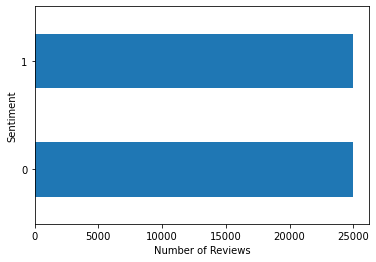

In [17]:
ax = dataframe['sentiment'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel('Number of Reviews')
ax.set_ylabel('Sentiment')

## Wordcloud

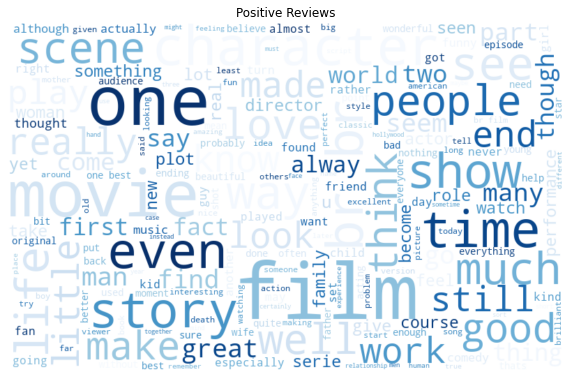

In [18]:
from wordcloud import WordCloud
normal_words =' '.join([text for text in dataframe['processed_text'][dataframe['sentiment'] == 1]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Blues',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Positive Reviews")
plt.axis('off') 
plt.show()

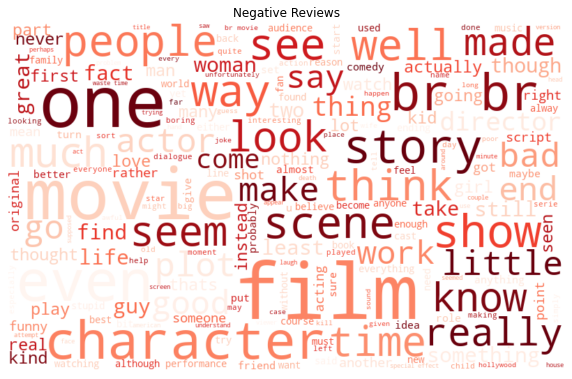

In [19]:
normal_words =' '.join([text for text in dataframe['processed_text'][dataframe['sentiment'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,colormap='Reds',background_color='White').generate(normal_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Negative Reviews")
plt.axis('off') 
plt.show()

### Bigrams

In [30]:
text_content = dataframe['processed_text'].tolist()
bigrams_list = list(nltk.bigrams(text_content))
dictionary2 = [' '.join(tup) for tup in bigrams_list]

vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])
words_dict = dict(words_freq)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


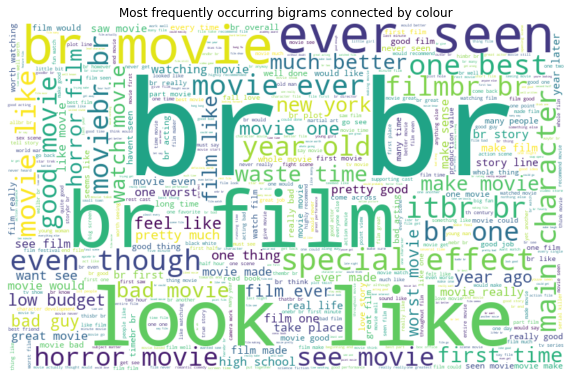

In [38]:
nltk.download('stopwords')
stopwordsList = stopwords.words('english')
stopwordsList.append('br')

wordCloud = WordCloud(max_words=500, height=500, width=800,stopwords=stopwordsList,background_color='white')
wordCloud.generate_from_frequencies(words_dict)

plt.figure(figsize=(10, 7))
plt.title('Most frequently occurring bigrams connected by colour')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Frequency of Words using Bag of Words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

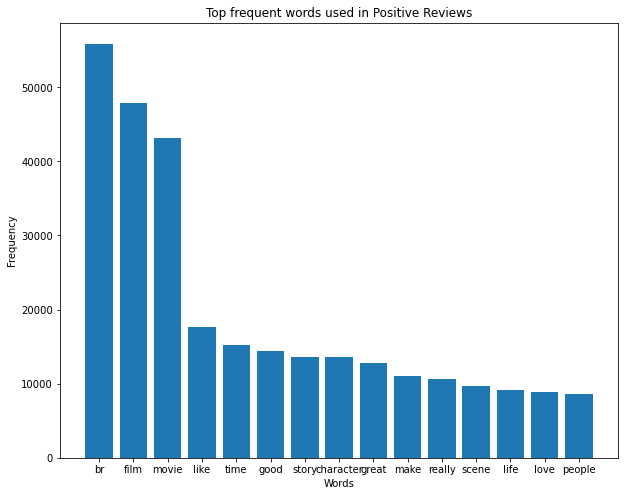

In [23]:
pos_bow = bow_vectorizer.fit_transform(dataframe['processed_text'][dataframe['sentiment'] == 1])
pos_top_sum=pos_bow.toarray().sum(axis=0)
pos_top_sum_cv=[pos_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(pos_top_sum_cv[0])):
    dic[columns_cv[i]]=pos_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Positive Reviews')
plt.show()


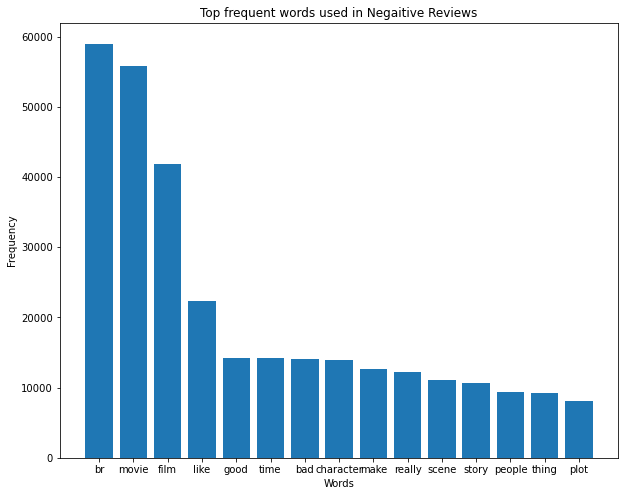

In [25]:
neg_bow = bow_vectorizer.fit_transform(dataframe['processed_text'][dataframe['sentiment'] == 0])
neg_top_sum=neg_bow.toarray().sum(axis=0)
neg_top_sum_cv=[neg_top_sum]#to let pandas know that these are rows
columns_cv = bow_vectorizer.get_feature_names()


import operator
dic = {}
for i in range(len(neg_top_sum_cv[0])):
    dic[columns_cv[i]]=neg_top_sum_cv[0][i]
sorted_dic=sorted(dic.items(),reverse=True,key=operator.itemgetter(1))

sorted_dic = sorted_dic[:15]
xs, ys = [*zip(*sorted_dic)]
plt.figure(figsize=(10,8))
plt.bar(xs, ys)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top frequent words used in Negaitive Reviews')
plt.show()